NAME : ANBUSELVAN MAHALINGAM

SUBJECT : DSC 630 PREDICTIVE ANALYSIS - PROJECT 'GOLD PRICE PREDICTION'

In [51]:
# To supress the warning.
import warnings
warnings.filterwarnings('ignore')

#### Data Preparation and EDA

In [52]:
# To load the dataset, data from multiple csv files

import pandas as pd
import os

# User defined function to load the datasets
def files_read(file_path):
    try:
        # List all CSV files in the directory
        csv_files = [file for file in os.listdir(folder_path) 
                     if file.endswith('.csv')]
        # Load and concatenate all CSV files into one DataFrame
        all_data_df = pd.concat([pd.read_csv(os.path.join(folder_path, file)) 
                                 for file in csv_files], ignore_index=True)        
        return all_data_df
    except:
        print("Unable to Load the Files.please verify the file name and location!")   


In [53]:
# To Load the USD index dataset (2000-2023)

folder_path = 'data\GOLDConract'
# Monthly USD index range
USD_Index_Mon_df = files_read(folder_path)

# Remove 'Open','Low' & 'High' columns from the USD Index DataFrame
USD_Index_Mon_df = USD_Index_Mon_df.drop(columns=['Open', 'Low', 'High'])

print("Basic USD Index DataFrame information:\n")
USD_Index_Mon_df.head(n=2), USD_Index_Mon_df.tail(n=2)


Basic USD Index DataFrame information:



(      Date   Close
 0  12/2000  109.54
 1  11/2000  115.24,
         Date   Close
 302  02/2023  104.87
 303  01/2023  102.10)

In [54]:
# To save the result into a csv file.
USD_Index_Mon_df.to_csv('USD_Index_Mon_df_results.csv', index=False)

In [55]:
# To read Monthly GOLD price in UDS per oz.
GOLD_price_df = pd.read_excel("data/Historic-Gold-Prices-February-2024.xlsx")

# Extracting and renaming the necessary columns
GOLD_price_df = GOLD_price_df[['USD/Gold', 'Unnamed: 5']]
GOLD_price_df.columns = ['Date', 'Price']

# To filter the data for dates from 2000 to 2023
filtered_data = GOLD_price_df[(GOLD_price_df['Date'] >= '2000-01-01')
        & (GOLD_price_df['Date'] <= '2023-12-31')]

# Group by year and month and calculate the average price
GOLD_price_Mon_df = filtered_data.resample('M', on='Date').mean()

# Reset index to make 'Date' a column again
GOLD_price_Mon_df.reset_index(inplace=True)
GOLD_price_Mon_df.head(n=2), GOLD_price_Mon_df.tail(n=2)                              

(        Date       Price
 0 2000-01-31  284.685714
 1 2000-02-29  299.809524,
           Date        Price
 286 2023-11-30  1985.146418
 287 2023-12-31  2034.176415)

In [56]:
# To save the result into a csv file.
GOLD_price_Mon_df.to_csv('GOLD_price_Mon_df_results.csv', index=False)

In [57]:
# To convert the 'Date' columns to datetime format
USD_Index_Mon_df['Date'] = pd.to_datetime(USD_Index_Mon_df['Date'],
                                          format='%m/%Y')
GOLD_price_Mon_df['Date'] = pd.to_datetime(GOLD_price_Mon_df['Date'],
                                           format='%Y-%m-%d')

In [58]:
# To display summary statistics
print("\nSummary statistics for USD Index:")
print(USD_Index_Mon_df.describe())
print("\nSummary statistics for GOLD Prices:")
print(GOLD_price_Mon_df.describe())


Summary statistics for USD Index:
                                Date       Close
count                            304  304.000000
mean   2012-02-18 23:26:50.526315776   91.870526
min              2000-01-01 00:00:00   71.800000
25%              2006-03-24 06:00:00   81.720000
50%              2012-03-16 12:00:00   91.855000
75%              2018-01-08 18:00:00   98.562500
max              2023-12-01 00:00:00  120.280000
std                              NaN   11.321482

Summary statistics for GOLD Prices:
                      Date        Price
count                  288   288.000000
mean   2012-01-14 21:30:00  1083.604523
min    2000-01-31 00:00:00   260.850000
25%    2006-01-23 06:00:00   540.920455
50%    2012-01-15 12:00:00  1210.064805
75%    2018-01-07 18:00:00  1504.304727
max    2023-12-31 00:00:00  2034.176415
std                    NaN   541.621577


In [59]:
# Merge the datasets based on the nearest date - co-relation analysis
combined_df = pd.merge_asof(GOLD_price_Mon_df.sort_values('Date'), 
                            USD_Index_Mon_df.sort_values('Date'), 
                            on='Date', direction='nearest')

# To calculate the correlation
correlation = combined_df['Close'].corr(combined_df['Price'])

print("Correlation between USD Index Closing Prices and Gold Prices:", correlation)

Correlation between USD Index Closing Prices and Gold Prices: -0.18633324011900776


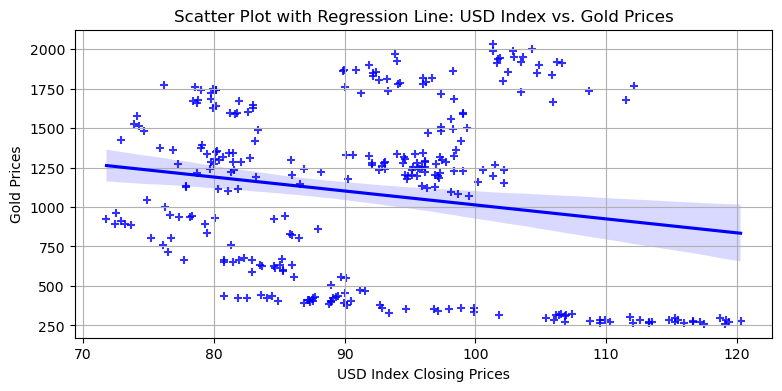

In [60]:
# Scatter Plot with Regression Line
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the co-relation
plt.figure(figsize=(9, 4))

# To create a scatter plot with a linear fit line
sns.regplot(x='Close', y='Price', data=combined_df, fit_reg=True, marker='+',
            color='blue')

# Adding titles and labels
plt.title('Scatter Plot with Regression Line: USD Index vs. Gold Prices')
plt.xlabel('USD Index Closing Prices')
plt.ylabel('Gold Prices')

# to displaying the plot
plt.grid(True)
plt.show()

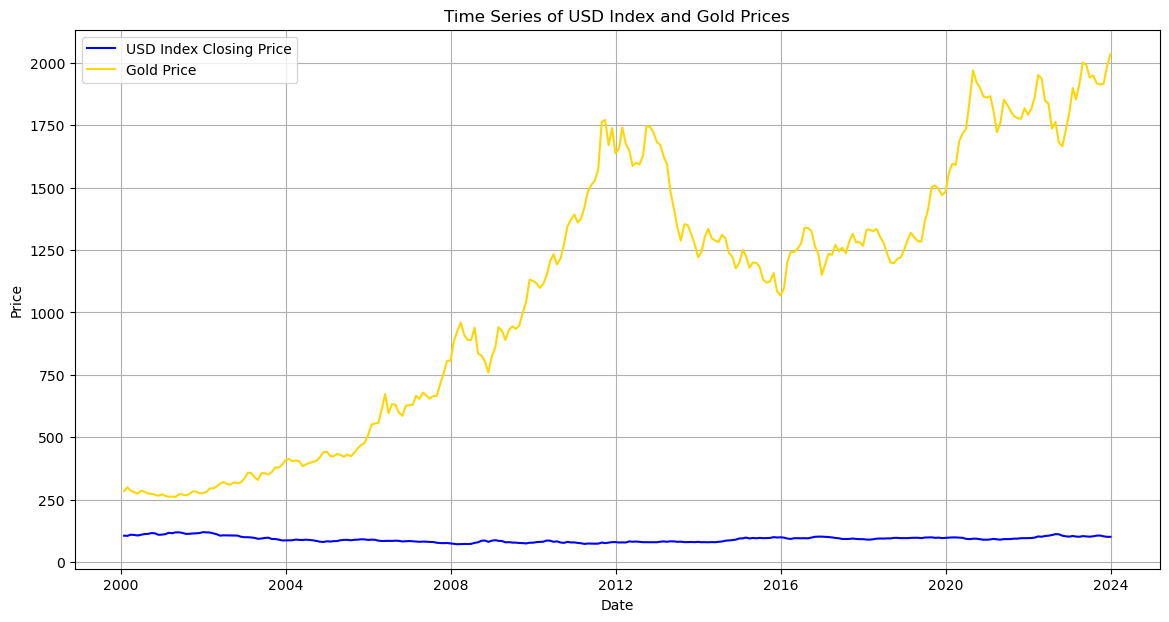

In [61]:
# Time Series Plot
plt.figure(figsize=(14, 7))
plt.plot(combined_df['Date'], combined_df['Close'],
         label='USD Index Closing Price', color='blue')
plt.plot(combined_df['Date'], combined_df['Price'],
         label='Gold Price', color='gold')
plt.title('Time Series of USD Index and Gold Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Negative Correlation: A negative correlation value -0.1863 suggests that as one variable increases, the other tends to decrease. However, the strength of this relationship is weak in this case because the correlation coefficient is close to zero.

Weak Influence: This weak negative correlation implies that movements in the USD Index are not strongly predictive of changes in Gold Prices.

Additional Analysis Needed: To better understand the relationship, we need to consider looking into other factors that influence both markets.we are planning inlude market sentiment index Fear and Greed index.

Scatter Plot with Regression Line - The plot indicates a downward trend, suggesting that as the USD Index increases, the Gold Prices tend to decrease. there is a inverse relationship between a strong currency and GOLD.

In [62]:
# To load the Market sentiment analysis dataset
try:
    stock_senti_data = pd.read_csv("data/stock_senti_analysis.csv",
                                   encoding='ISO-8859-1')
    display_info = (stock_senti_data.tail(n=1),
                    stock_senti_data.columns)
except Exception as e:
    display_info = str(e)

In [63]:
import pandas as pd
from textblob import TextBlob
# Function to get sentiment using TextBlob
def get_sentiment(text):
    # to ensure the input is a string
    if not isinstance(text, str):
        return 'Unknown' 
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity  # Polarity score: -1, 0, 1
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'
# To apply the sentiment analysis function to each headline
for i in range(1, 26):  # dataset has 25 top headlines columns named 'Top1' to 'Top25'
    stock_senti_data[f'Top{i}_sentiment'] = stock_senti_data[f'Top{i}'].apply(get_sentiment)
# to calculate average sentiment score for each day (example calculation)
stock_senti_data['Average_Sentiment_Score'] = stock_senti_data[[f'Top{i}_sentiment' 
                                                for i in range(1, 26)]].apply(
    lambda row: (row.values == 'Positive').sum() -
    (row.values == 'Negative').sum(), axis=1)
# To save results
print(stock_senti_data[['Date', 'Average_Sentiment_Score']].head())
stock_senti_data.to_csv('sentiment_analysis_results.csv', index=False)


         Date  Average_Sentiment_Score
0  2000-01-03                        3
1  2000-01-04                       -2
2  2000-01-05                        3
3  2000-01-06                        3
4  2000-01-07                        4


In [64]:
display_info = (stock_senti_data.tail(n=1), stock_senti_data.columns)

In [65]:
# To load the Market sentiment analysis dataset & index value
try:
    stock_senti_data = pd.read_csv("sentiment_analysis_results.csv", 
                                   encoding='ISO-8859-1')
except Exception as e:
    display_info = str(e)
# Extract only the score and label
sentiment_score_data = stock_senti_data[['Date', 'Label', 
                                         'Average_Sentiment_Score']]

In [66]:
# To display the latest sentiment score dataset
display_score_info = (sentiment_score_data.columns)
display_score_info

Index(['Date', 'Label', 'Average_Sentiment_Score'], dtype='object')

In [67]:
sentiment_score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date                     4101 non-null   object
 1   Label                    4101 non-null   int64 
 2   Average_Sentiment_Score  4101 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 96.2+ KB


In [68]:
# To calculate the monthly average sentiment score from daily data
from scipy.stats import mode
# To convert the 'Date' column to datetime & Set the 'Date' column as the index
sentiment_score_data['Date'] = pd.to_datetime(sentiment_score_data['Date'])
sentiment_score_data.set_index('Date', inplace=True)
# Function to calculate the mode that returns the most frequent item
def get_mode(series):
    return mode(series)[0]
# To resample the data by month and calculate the mean
monthly_sentiment = sentiment_score_data.resample('M').agg({
    'Average_Sentiment_Score': 'mean',
    'Label': lambda x: get_mode(x)
})
# to reset index to turn the data back into a DataFrame
monthly_sentiment = monthly_sentiment.reset_index()
# to save the monthly averages to a new CSV file
monthly_sentiment.to_csv('monthly_average_sentiment_scores_label.csv',
                         index=False)

In [69]:
monthly_sentiment.describe()

,Date,Average_Sentiment_Score,Label
count,199,199.000000,199.000000
mean,2008-04-30 10:15:04.522612992,1.471043,0.542714
min,2000-01-31 00:00:00,-1.333333,0.000000
25%,2004-03-15 12:00:00,0.900000,0.000000
50%,2008-04-30 00:00:00,1.500000,1.000000
75%,2012-06-15 00:00:00,1.931522,1.000000
max,2016-07-31 00:00:00,3.904762,1.000000
std,NaN,0.856250,0.499429


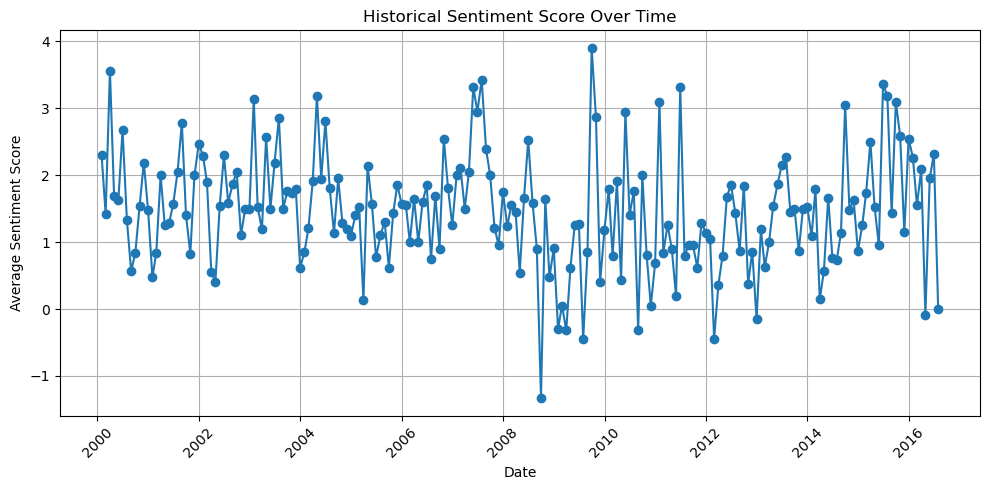

In [70]:
# Line graph plot for historical Market Sentiment

# Convert the 'Date' column to datetime format for better x-axis representation
monthly_sentiment['Date'] = pd.to_datetime(monthly_sentiment['Date'])

# to Plot line graph
plt.figure(figsize=(10, 5))
plt.plot(monthly_sentiment['Date'], 
         monthly_sentiment['Average_Sentiment_Score'], 
         marker='o', linestyle='-') 
plt.title('Historical Sentiment Score Over Time') 
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True) 
plt.xticks(rotation=45) 

plt.tight_layout() 
plt.show()

Now, we have 3 dataset, each dataset contains information per month data(mean)

1.Monthly average GOLD price in USD per Oz unit

2.Monthly UDS index value(mean)

3.Montly market sentiment score and label(-1,0,1).

In [71]:
# To combine All 3 dataset into one dataset

# Load the dataset
gold_prices_data = pd.read_csv('GOLD_price_Mon_df_results.csv')

# Load the new dataset
usd_index_data = pd.read_csv('USD_Index_Mon_df_results.csv')

# Load the new dataset
sentiment_scores_data = pd.read_csv('monthly_average_sentiment_scores_label.csv')

# Convert date in USD Index to datetime and align format with other datasets
usd_index_data['Date'] = pd.to_datetime(usd_index_data['Date']).dt.to_period('M').dt.to_timestamp('M')

# Ensure all date columns are of the same datetime type
gold_prices_data['Date'] = pd.to_datetime(gold_prices_data['Date'])
sentiment_scores_data['Date'] = pd.to_datetime(sentiment_scores_data['Date'])

# Attempt to merge the datasets again on the 'Date' column
full_combined_data = pd.merge(gold_prices_data, usd_index_data, on='Date', how='outer')
full_combined_data = pd.merge(full_combined_data, sentiment_scores_data,
                              on='Date', how='outer')

# to drop the duplicate column
if 'Average_Sentiment_Score_y' in full_combined_data.columns:
    full_combined_data.drop(columns='Average_Sentiment_Score_y', inplace=True)

# Rename the columns to more descriptive names
full_combined_data.rename(columns={
    'Price': 'Gold_Price',
    'Close': 'USD__Closing',
    'Average_Sentiment_Score_x': 'Average_Sentiment_Score'
}, inplace=True)

# we are considering dataset pior to 2016, to match all 3 datsets range.
full_combined_data = full_combined_data[full_combined_data['Date'] <= '2016-01-01']

# To Store a backup for hadlin multiple ML models.
full_combined_data.to_csv('full_combined_data-1.csv',
                       index=False)

# Check the first few rows of the merged dataset
full_combined_data.head()

,Date,Gold_Price,USD__Closing,Average_Sentiment_Score,Label
0,2000-01-31,284.685714,105.03,2.300000,0.0
1,2000-02-29,299.809524,106.01,1.421053,0.0
2,2000-03-31,285.743478,105.43,3.565217,1.0
3,2000-04-30,279.755000,109.95,1.684211,0.0
4,2000-05-31,274.767391,108.74,1.636364,0.0


In [72]:
full_combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     200 non-null    datetime64[ns]
 1   Gold_Price               200 non-null    float64       
 2   USD__Closing             200 non-null    float64       
 3   Average_Sentiment_Score  200 non-null    float64       
 4   Label                    200 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 9.4 KB


    Date: Specifies the end of each month.
    Price: Monthly average gold price.
    Close: Closing value of the U.S. Dollar Index for the respective month.
    Average_Sentiment_Score: Average sentiment score, possibly reflecting overall market or economic sentiment.

##### Time Series decomposition

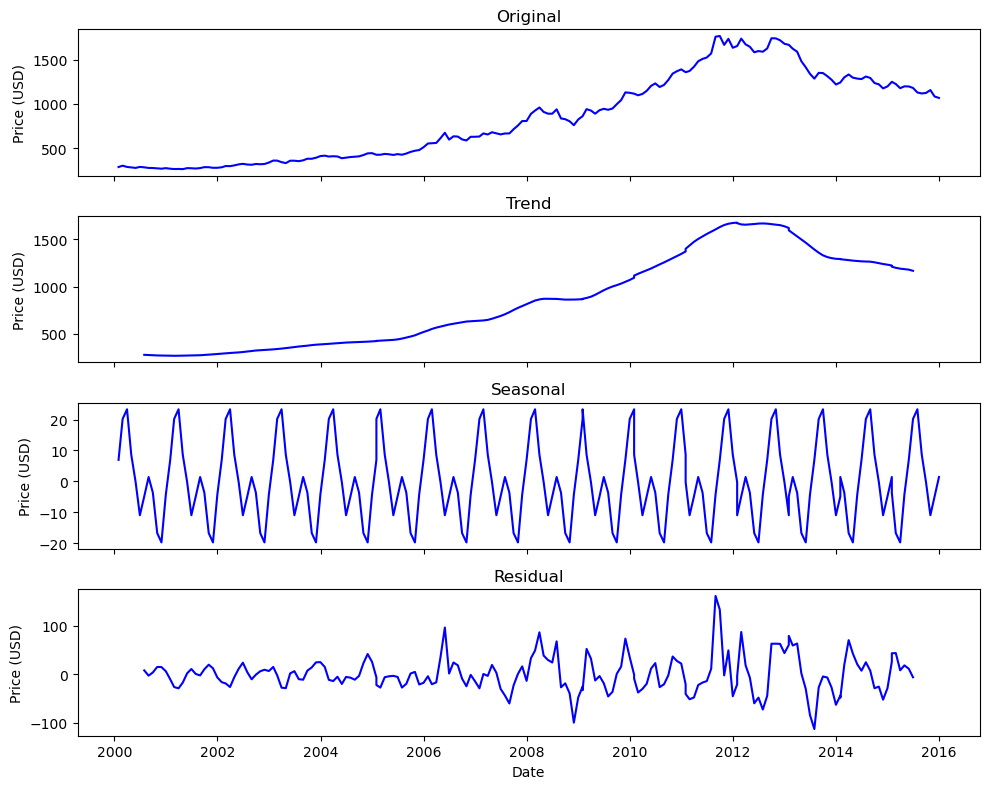

In [73]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

full_combined_data.set_index('Date', inplace=True)
# Decompose the time series
result = seasonal_decompose(full_combined_data['Gold_Price'],
                            model='additive', period=12)  

# Create a figure to hold the subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True) 

# Original Series
axes[0].plot(result.observed, color='blue')
axes[0].set_title('Original')
axes[0].set_ylabel('Price (USD)')  # Setting Y-axis label

# Trend Component
axes[1].plot(result.trend, color='blue')
axes[1].set_title('Trend')
axes[1].set_ylabel('Price (USD)')  # Setting Y-axis label

# Seasonal Component
axes[2].plot(result.seasonal, color='blue')
axes[2].set_title('Seasonal')
axes[2].set_ylabel('Price (USD)')  # Setting Y-axis label

# Residual Component
axes[3].plot(result.resid, color='blue')
axes[3].set_title('Residual')
axes[3].set_ylabel('Price (USD)')  # Setting Y-axis label
axes[3].set_xlabel('Date') 

# to prevent labels/ titles from overlapping
fig.tight_layout()

# Show plot
plt.show()

    Observed Data: Shows the actual gold price movements over time, which seem to have increased substantially after 2008, with some fluctuations.
    Trend Component: Indicates a general upward trend over the last two decades, with a noticeable rise post-2008, possibly due to economic factors like inflation or political, global economic events.
    Seasonal Component: Exhibits periodic fluctuations within a year, which could be due to cyclical factors affecting gold demand and supply.
    Residual Component: Shows irregular fluctuations that are not explained by the trend or seasonality. This could include effects of unforeseen political events, economic news, or market sentiment.

##### Corelations among the three metrics(GOLD, USD & market Sentiment)

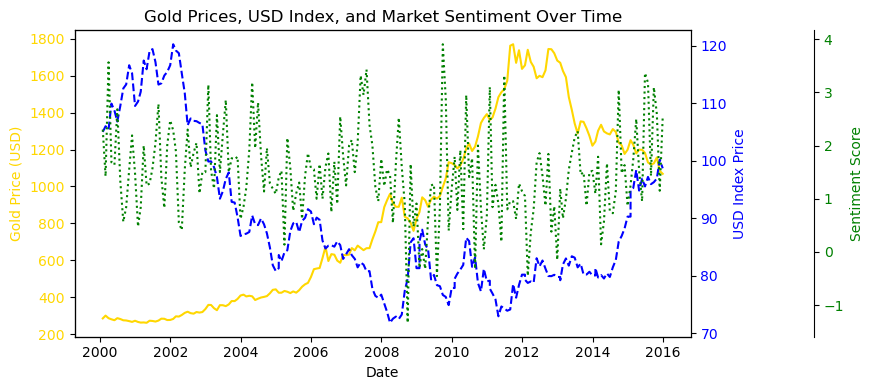

In [74]:
import matplotlib.pyplot as plt

#full_combined_data.set_index('Date', inplace=True)

# To calculate the correlations among the three metrics
correlation_matrix = full_combined_data.corr()

# To create a visualization to show how these variables interact over time
fig, ax1 = plt.subplots(figsize=(9, 4))

# Plotting Gold Prices
color = 'gold'
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price (USD)', color=color)
ax1.plot(full_combined_data.index, full_combined_data['Gold_Price'], 
         color=color, label='Gold Price')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the USD Index Prices
ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('USD Index Price', color=color)
ax2.plot(full_combined_data.index, full_combined_data['USD__Closing'],
         color=color, linestyle='--', label='USD Index Price')
ax2.tick_params(axis='y', labelcolor=color)

# Create a third y-axis for the Sentiment Scores
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))
color = 'green'
ax3.set_ylabel('Sentiment Score', color=color)
ax3.plot(full_combined_data.index, full_combined_data['Average_Sentiment_Score'],
         color=color, linestyle=':', label='Sentiment Score')
ax3.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Gold Prices, USD Index, and Market Sentiment Over Time')
fig.tight_layout()
plt.show()

In [75]:
correlation_matrix

,Gold_Price,USD__Closing,Average_Sentiment_Score,Label
Gold_Price,1.000000,-0.662385,-0.208754,0.138773
USD__Closing,-0.662385,1.000000,0.183773,-0.195107
Average_Sentiment_Score,-0.208754,0.183773,1.000000,0.002689
Label,0.138773,-0.195107,0.002689,1.000000


Correlation Matrix:

    Gold Price and USD Closing (-0.192682): This value indicates a weak negative correlation. Typically, gold is viewed as a hedge against currency devaluation; hence, it often moves inversely to the strength of the U.S. dollar. This relationship suggests that when the U.S. dollar strengthens, gold prices may slightly decrease, and vice versa.
    Gold Price and Average Sentiment Score (-0.202827):  This weak negative correlation suggests that when market sentiment is positive gold prices might slightly decrease. Gold is often considered a "safe haven" during times of economic uncertainty, so better sentiment can reduce the demand for gold.
    USD Closing and Average Sentiment Score (0.184210): This weak positive correlation indicates that a stronger U.S. dollar might coincide with better market sentiment.

Visualization:

    The plot clearly shows the inverse relationship between gold prices and the USD Index, consistent with typical market behaviors where gold often acts as a hedge against dollar depreciation.
    The sentiment score, while less pronounced in its correlation, does show variations that occasionally align with shifts in the other two metrics, especially noticeable during periods of economic uncertainty or significant market events.

##### Stationarity Validation

In [76]:
from statsmodels.tsa.stattools import adfuller
# Check for stationarity
result = adfuller(full_combined_data['Gold_Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# Interpretation of the test results
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

ADF Statistic: -1.101755
p-value: 0.714372
Series is not stationary


In [77]:
# Apply Differencing the series - to make stationary
full_combined_data['Gold_Price_diff'] = full_combined_data['Gold_Price'].diff()
# Check stationarity again
result_diff = adfuller(full_combined_data['Gold_Price_diff'].dropna())
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])
# Check the results
if result_diff[1] > 0.05:
    print("Differenced series is not stationary")
else:
    print("Differenced series is stationary")

ADF Statistic: -12.135490
p-value: 0.000000
Differenced series is stationary


##### Gold price change over the period of time

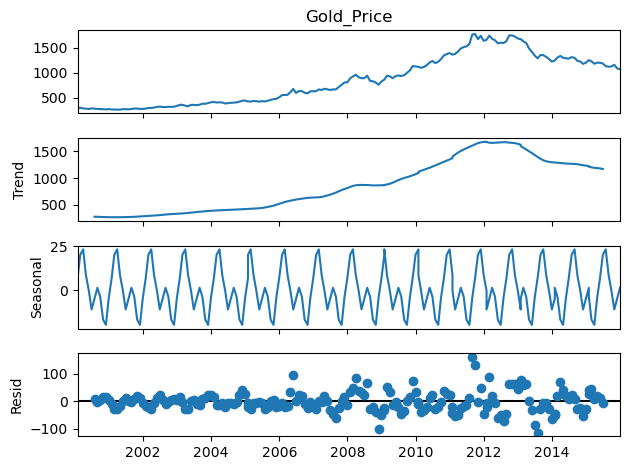

ADF Statistic: -5.984356
p-value: 0.000000


In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the series
decomposition = seasonal_decompose(full_combined_data['Gold_Price'], 
                                   model='additive', period=12)

# Plot the decomposed components
decomposition.plot()
plt.show()

# Check stationarity on the residuals
result_resid = adfuller(decomposition.resid.dropna())
print('ADF Statistic: %f' % result_resid[0])
print('p-value: %f' % result_resid[1])


In [79]:
# Print the columns in the DataFrame to check if 'Date' is one of them
print(full_combined_data.columns)

# If 'Date' is not a column, it might be the index; check the index
print(full_combined_data.index)

Index(['Gold_Price', 'USD__Closing', 'Average_Sentiment_Score', 'Label',
       'Gold_Price_diff'],
      dtype='object')
DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30',
               '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=200, freq=None)


In [80]:
# Check for duplicate dates in the index
duplicate_dates = full_combined_data.index.duplicated()
print(f"Number of duplicate dates: {duplicate_dates.sum()}")

Number of duplicate dates: 8


In [81]:
# Drop duplicates, keeping the first occurrence
full_combined_data = full_combined_data[~full_combined_data.index.duplicated(keep='first')]

In [82]:
# Setting the frequency of the DataFrame to monthly
full_combined_data = full_combined_data.asfreq('M')
print(full_combined_data.head(n=3))

            Gold_Price  USD__Closing  Average_Sentiment_Score  Label  \
Date                                                                   
2000-01-31  284.685714        105.03                 2.300000    0.0   
2000-02-29  299.809524        106.01                 1.421053    0.0   
2000-03-31  285.743478        105.43                 3.565217    1.0   

            Gold_Price_diff  
Date                         
2000-01-31              NaN  
2000-02-29        15.123810  
2000-03-31       -14.066046  


In [83]:
# To fill NaN values with 0 or use forward/backward filling as appropriate
full_combined_data['Gold_Price_diff'].fillna(0, inplace=True)
full_combined_data_prophet = full_combined_data.copy(deep=True)
full_combined_data_hybrid = full_combined_data.copy(deep=True)

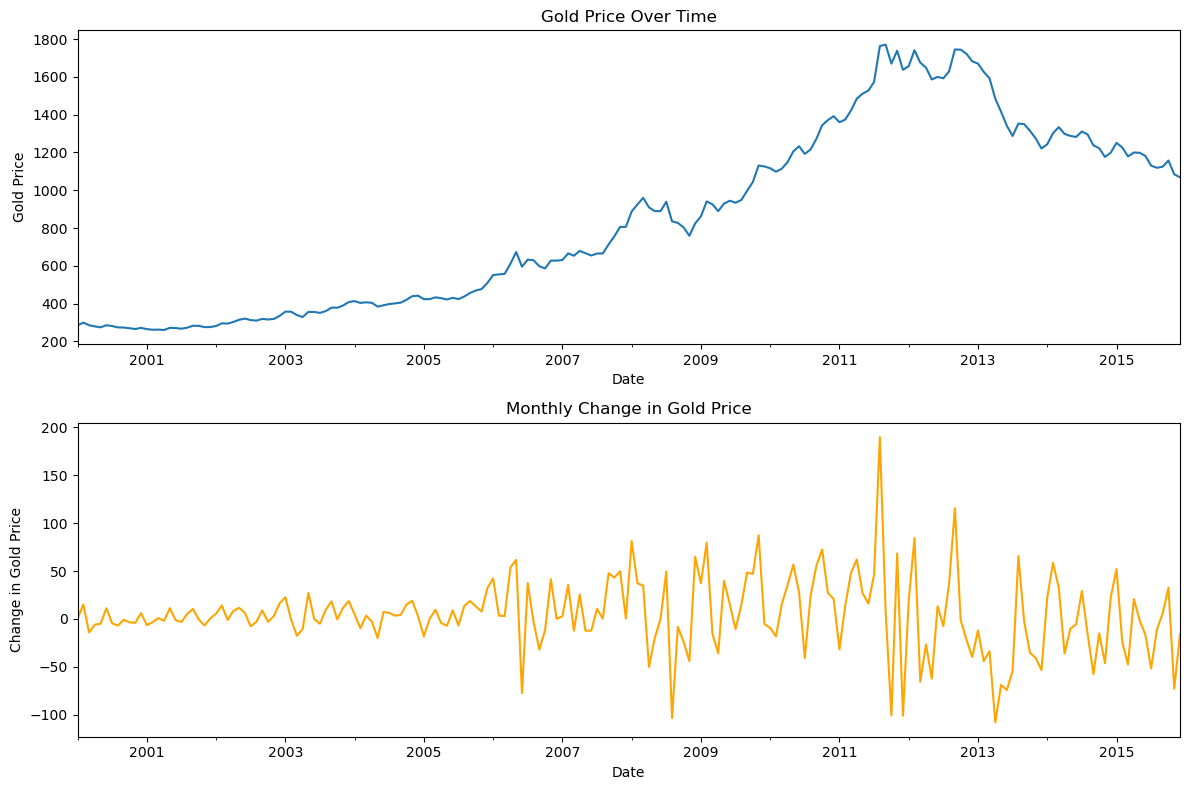

In [84]:
import matplotlib.pyplot as plt

# Plotting Gold Price and its differences
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

full_combined_data['Gold_Price'].plot(ax=ax[0], title='Gold Price Over Time')
ax[0].set_ylabel('Gold Price')

full_combined_data['Gold_Price_diff'].plot(ax=ax[1], color='orange',
                                           title='Monthly Change in Gold Price')
ax[1].set_ylabel('Change in Gold Price')

plt.tight_layout()
plt.show()

##### Approach 1 : ARIMA model time series analysis for GOLD price prediction

In [85]:
# Finding the best ARIMA model automatically
import numpy as np
from pmdarima import auto_arima
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Splitting the data - last 12 months are the validation set
train, valid = train_test_split(full_combined_data['Gold_Price'],
                                train_size=len(full_combined_data['Gold_Price']) - 12)
model = auto_arima(train, seasonal=False, stepwise=True, 
                   suppress_warnings=True, error_action="ignore",
                   trace=True) # Fit model on training data
forecast, conf_int = model.predict(n_periods=12, return_conf_int=True)
actuals = valid.values # Actual values from the validation set
rmse_arima = np.sqrt(mean_squared_error(actuals, forecast)) # To Calculating RMSE
print("ARIMA Model - The RMSE on the prediction:", rmse_arima)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1814.653, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1816.383, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1813.620, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1813.423, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1817.551, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1812.796, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1814.242, Time=0.54 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1814.349, Time=0.49 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1815.313, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1815.547, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1813.596, Time=0.19 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.306 seconds
ARIMA Model - The RMSE on the prediction: 104.50058697003496


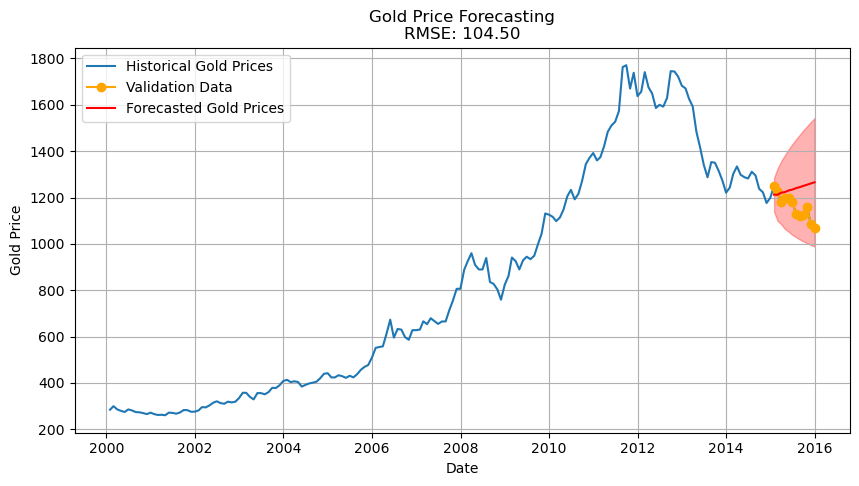

In [86]:
import matplotlib.pyplot as plt
# Creating time index for the forecast:
forecast_index = pd.date_range(start=train.index[-1],
                               periods=len(forecast) + 1, freq='M')[1:]
plt.figure(figsize=(10, 5))
# Plotting historical data
plt.plot(full_combined_data.index, full_combined_data['Gold_Price'],
         label='Historical Gold Prices')
# Highlighting the validation set
plt.plot(forecast_index, actuals, 'o-', color='orange', 
         label='Validation Data')
# Plotting the forecast
plt.plot(forecast_index, forecast, 'r-', label='Forecasted Gold Prices')
# Filling the confidence interval
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1],
                 color='red', alpha=0.3)
# Adding titles and labels
plt.title('Gold Price Forecasting\nRMSE: {:.2f}'.format(104.50058697003496))
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True)
plt.show()

##### Approach 2 : SARIMAX model time series analysis for GOLD price prediction

In [87]:
# Analyzing Impact of USD and Market Sentiment
# SARIMAX model, which extends ARIMA to include external regressors
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Prepare exogenous variables
exog_data = full_combined_data[['USD__Closing', 'Label']]
sarimax_model = SARIMAX(full_combined_data['Gold_Price'], 
                        exog=exog_data, order=(1,1,1), 
                        seasonal_order=(0,0,0,12)) # Fit SARIMAX model
sarimax_result = sarimax_model.fit()
print(sarimax_result.summary()) 
exog_future = exog_data[-12:]  # Forecast with SARIMAX model
sarimax_forecast = sarimax_result.get_forecast(steps=12, exog=exog_future)
forecast_values = sarimax_forecast.predicted_mean
conf_int = sarimax_forecast.conf_int()


                               SARIMAX Results                                
Dep. Variable:             Gold_Price   No. Observations:                  192
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -958.077
Date:                Wed, 29 May 2024   AIC                           1926.154
Time:                        20:53:52   BIC                           1942.415
Sample:                    01-31-2000   HQIC                          1932.741
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
USD__Closing    -3.4224      1.258     -2.720      0.007      -5.888      -0.957
Label            4.2589      3.840      1.109      0.267      -3.268      11.785
ar.L1           -0.7149      0.104     -6.89

In [88]:
# Calculate RMSE for SARIMAX model
actual_values = full_combined_data['Gold_Price'][-12:] 
predicted_values = forecast_values
actual_values.index = pd.date_range(start=full_combined_data.index[-12], 
                                    periods=12, freq='M')

# Calculate RMSE
rmse_sarimax = np.sqrt(mean_squared_error(actual_values, predicted_values))
print("SARIMAX Model - The RMSE on the prediction:", {rmse_sarimax})

SARIMAX Model - The RMSE on the prediction: {89.96013063455997}


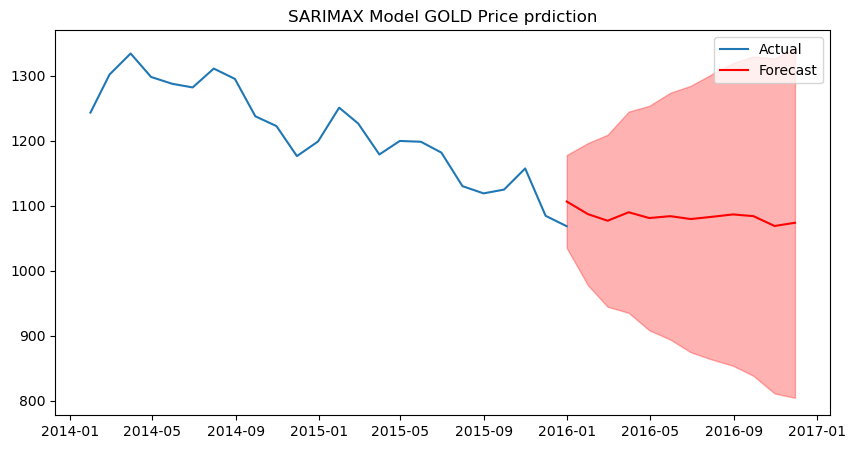

In [89]:
# Plot the forecast with confidence intervals
plt.figure(figsize=(10, 5))
plt.title("SARIMAX Model GOLD Price prdiction")
plt.plot(full_combined_data.index[-24:], 
         full_combined_data['Gold_Price'][-24:], label='Actual')
plt.plot(pd.date_range(full_combined_data.index[-1], periods=12, freq='M'),
         forecast_values, label='Forecast', color='red')
plt.fill_between(pd.date_range(full_combined_data.index[-1], periods=12, freq='M'),
                 conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.legend()
plt.show()

##### Approach 3 : prophet ML for predicting GOLD Price

In [90]:
# prophet ML for predicting GOLD Price
# Reset the index to make 'Date' a column again
full_combined_data_prophet.reset_index(inplace=True)

# to rename the columns for use with Prophet
full_combined_data_prophet.rename(columns={'Date': 'ds', 'Gold_Price': 'y'}, inplace=True)

# Now, DataFrame is ready for Prophet
print(full_combined_data_prophet.head())

          ds           y  USD__Closing  Average_Sentiment_Score  Label  \
0 2000-01-31  284.685714        105.03                 2.300000    0.0   
1 2000-02-29  299.809524        106.01                 1.421053    0.0   
2 2000-03-31  285.743478        105.43                 3.565217    1.0   
3 2000-04-30  279.755000        109.95                 1.684211    0.0   
4 2000-05-31  274.767391        108.74                 1.636364    0.0   

   Gold_Price_diff  
0         0.000000  
1        15.123810  
2       -14.066046  
3        -5.988478  
4        -4.987609  


20:53:53 - cmdstanpy - INFO - Chain [1] start processing
20:53:53 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model - The RMSE on the prediction: 86.04040090512842


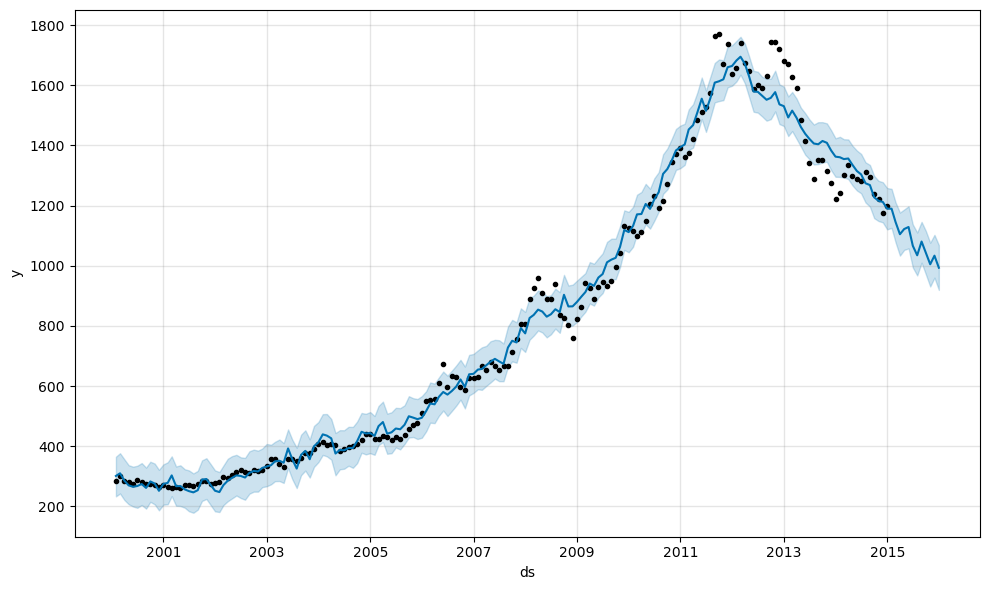

In [91]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# To split data into train and test sets
train = full_combined_data_prophet[['ds', 'y', 'USD__Closing', 'Average_Sentiment_Score']][:-12]
test = full_combined_data_prophet[['ds', 'y', 'USD__Closing', 'Average_Sentiment_Score']][-12:]

# To initialize the Prophet model
model = Prophet()
model.add_regressor('USD__Closing')
model.add_regressor('Average_Sentiment_Score')

# to fit the model with the regressors
model.fit(train)

# To create future dataframe for predictions (next 12 months)
future = model.make_future_dataframe(periods=12, freq='M')
# Add the future values for the regressors
future['USD__Closing'] = list(train['USD__Closing']) + list(test['USD__Closing'])
future['Average_Sentiment_Score'] = list(train['Average_Sentiment_Score']) + list(test['Average_Sentiment_Score'])

# To make predictions
forecast = model.predict(future)

# To plot the forecast
fig1 = model.plot(forecast)

# Extract the forecasted values for the test set dates (last 12 months)
test_forecast = forecast.loc[forecast['ds'].isin(test['ds'])]

# To calculate RMSE
mse = mean_squared_error(test['y'], test_forecast['yhat'])
rmse_prophet = np.sqrt(mse)
print("Prophet Model - The RMSE on the prediction:", rmse_prophet)



##### Approach 4 : VAR + LSTM Approach

ML prediction model approach - combination of VAR-LSTM models

    VAR: Vector Autoregression, useful for multivariate time series where the prediction variable is influenced by other variables.
    LSTM: To capture the non-linear relationships in the residuals of the VAR model.

In [92]:
full_combined_data_hybrid.info

<bound method DataFrame.info of              Gold_Price  USD__Closing  Average_Sentiment_Score  Label  \
Date                                                                    
2000-01-31   284.685714        105.03                 2.300000    0.0   
2000-02-29   299.809524        106.01                 1.421053    0.0   
2000-03-31   285.743478        105.43                 3.565217    1.0   
2000-04-30   279.755000        109.95                 1.684211    0.0   
2000-05-31   274.767391        108.74                 1.636364    0.0   
...                 ...           ...                      ...    ...   
2015-08-31  1119.120952         95.93                 1.428571    0.0   
2015-09-30  1124.949545         96.28                 3.095238    1.0   
2015-10-31  1157.503182         96.92                 2.590909    1.0   
2015-11-30  1084.571429        100.20                 1.150000    0.0   
2015-12-31  1068.533478         98.69                 2.545455    0.0   

            Gold_P

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
full_combined_data_hybrid.reset_index(inplace=True)

full_combined_data_hybrid['Date'] = pd.to_datetime(full_combined_data_hybrid['Date'])

# Setting the index to 'Date' and ensuring it's only done once
full_combined_data_hybrid.set_index('Date', inplace=True)

# Setting the frequency - for example, monthly data
full_combined_data_hybrid = full_combined_data_hybrid.asfreq('M')

# To set 'Gold_Price' the target and other columns are predictors
y = full_combined_data_hybrid['Gold_Price']
X = full_combined_data_hybrid.drop('Gold_Price', axis=1)

# To split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [94]:
# to train VAR Model
from statsmodels.tsa.vector_ar.var_model import VAR

# Fit VAR model
var_model = VAR(X_train)
var_results = var_model.fit(maxlags=2, ic='aic') 

In [95]:
# Forecast using VAR
lag_order = var_results.k_ar
var_forecast = var_results.forecast(X_train.values[-lag_order:], steps=len(X_test))

In [96]:
# Preparing Data for LSTM

from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(var_forecast)  # Use VAR forecasts for testing

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [97]:
# LSTM Model Training
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(80, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Fit the model
model.fit(X_train_scaled, y_train, epochs=80, batch_size=72, 
          validation_data=(X_test_scaled, y_test), verbose=2, shuffle=False)


Epoch 1/80
3/3 - 8s - loss: 726.0952 - val_loss: 1312.6758 - 8s/epoch - 3s/step
Epoch 2/80
3/3 - 0s - loss: 726.0667 - val_loss: 1312.6487 - 94ms/epoch - 31ms/step
Epoch 3/80
3/3 - 0s - loss: 726.0383 - val_loss: 1312.6217 - 99ms/epoch - 33ms/step
Epoch 4/80
3/3 - 0s - loss: 726.0099 - val_loss: 1312.5945 - 84ms/epoch - 28ms/step
Epoch 5/80
3/3 - 0s - loss: 725.9815 - val_loss: 1312.5669 - 101ms/epoch - 34ms/step
Epoch 6/80
3/3 - 0s - loss: 725.9526 - val_loss: 1312.5388 - 83ms/epoch - 28ms/step
Epoch 7/80
3/3 - 0s - loss: 725.9231 - val_loss: 1312.5100 - 83ms/epoch - 28ms/step
Epoch 8/80
3/3 - 0s - loss: 725.8929 - val_loss: 1312.4803 - 100ms/epoch - 33ms/step
Epoch 9/80
3/3 - 0s - loss: 725.8617 - val_loss: 1312.4495 - 83ms/epoch - 28ms/step
Epoch 10/80
3/3 - 0s - loss: 725.8292 - val_loss: 1312.4171 - 87ms/epoch - 29ms/step
Epoch 11/80
3/3 - 0s - loss: 725.7953 - val_loss: 1312.3835 - 97ms/epoch - 32ms/step
Epoch 12/80
3/3 - 0s - loss: 725.7599 - val_loss: 1312.3479 - 116ms/epoch - 

In [98]:
y_scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

# Making Predictions and Evaluation
predicted_gold_prices = model.predict(X_test_scaled)
predicted_gold_prices = y_scaler.inverse_transform(predicted_gold_prices)  # Correct scaler used



2/2 [==============================] - 1s 16ms/step


In [99]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse_varlstm = mean_squared_error(y_test, predicted_gold_prices)
print("Hybrid VAR+LSTM Model - The RMSE on the prediction:", {mse_varlstm})


Hybrid VAR+LSTM Model - The RMSE on the prediction: {321540417.52332264}


In [100]:
# comparision and Evaluation of models
print("ARIMA Model - The RMSE on the prediction           :", {rmse_arima})
print("SARIMAX Model - The RMSE on the prediction         :", {rmse_sarimax})
print("Prophet Model - The RMSE on the prediction         :", {rmse_prophet})
print("Hybrid VAR+LSTM Model - The RMSE on the prediction :", {mse_varlstm})

ARIMA Model - The RMSE on the prediction           : {104.50058697003496}
SARIMAX Model - The RMSE on the prediction         : {89.96013063455997}
Prophet Model - The RMSE on the prediction         : {86.04040090512842}
Hybrid VAR+LSTM Model - The RMSE on the prediction : {321540417.52332264}


##### Conclusion

        Based on RMSE, the Prophet model is the best performing model, providing the most accurate predictions.

        The SARIMAX model also performs well, particularly when considering external factors affecting gold prices. The ARIMA model, while effective, is less accurate than both Prophet and SARIMAX.

        Hybrid Model Concerns: The hybrid VAR+LSTM model's high RMSE indicates potential problems that need addressing before it can be considered a reliable forecasting method.

         Integrating the best market sentiment dataset can significantly enhance the accuracy of gold price prediction models. The SARIMAX model already shows improvement with basic sentiment data, but higher quality and more granular sentiment information could further refine predictions. Focusing on obtaining and utilizing superior sentiment data will provide a more accurate and responsive forecasting system, leading to better decision-making and financial outcomes.

Recommendation

         For long-term investments, Prophet is highly recommended due to its ability to handle strong seasonal effects and provide robust forecasts over extended periods. For short-term investments, SARIMAX is preferable as it incorporates both seasonal patterns and external factors like market sentiment and USD closing prices, offering a more nuanced prediction.
    